In [1]:
%matplotlib inline

# Artificial Neural Networks
Artificial neural networks are not a new concept. They have been around for many years.

## Import Dependencies
We will begin by importing the required packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


## Get Our Data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')
# print("X_train original shape", X_train.shape)
# print("y_train original shape", y_train.shape)
print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


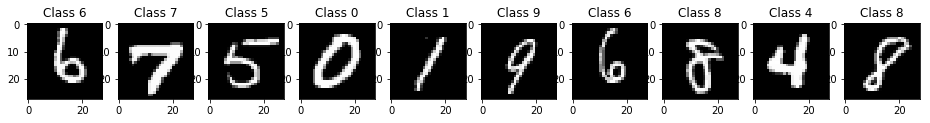

In [4]:
num_figures = 10
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

In [5]:
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


In [6]:
Y_train = np_utils.to_categorical(y_raw[0:3900], nb_classes)
Y_valid = np_utils.to_categorical(y_raw[3900:4875], nb_classes)
Y_test = np_utils.to_categorical(y_raw[4875:6500], nb_classes)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
                           
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train,
          batch_size=128, 
          epochs=10,
          verbose=1,
          validation_data=(X_valid, Y_valid))

Train on 3900 samples, validate on 975 samples
Epoch 1/10
3900/3900 [==============================] - 1s 172us/step - loss: 0.9084 - acc: 0.7387 - val_loss: 0.3616 - val_acc: 0.8995
Epoch 2/10
3900/3900 [==============================] - 0s 32us/step - loss: 0.3372 - acc: 0.9026 - val_loss: 0.2816 - val_acc: 0.9231
Epoch 3/10
3900/3900 [==============================] - 0s 38us/step - loss: 0.2092 - acc: 0.9385 - val_loss: 0.2468 - val_acc: 0.9303
Epoch 4/10
3900/3900 [==============================] - 0s 30us/step - loss: 0.1589 - acc: 0.9513 - val_loss: 0.2308 - val_acc: 0.9272
Epoch 5/10
3900/3900 [==============================] - 0s 34us/step - loss: 0.1095 - acc: 0.9677 - val_loss: 0.2353 - val_acc: 0.9374
Epoch 6/10
3900/3900 [==============================] - 0s 28us/step - loss: 0.0855 - acc: 0.9756 - val_loss: 0.2100 - val_acc: 0.9436
Epoch 7/10
3900/3900 [==============================] - 0s 29us/step - loss: 0.0633 - acc: 0.9815 - val_loss: 0.2168 - val_acc: 0.9415
Epoch 8

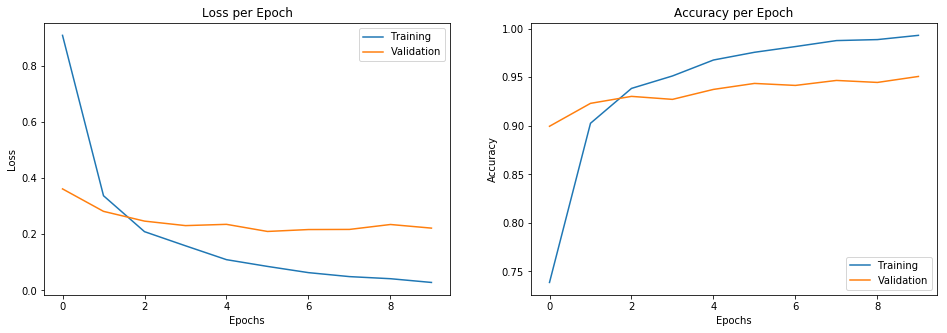

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.subplot(1,2,2)
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1625/1625 [==============================] - 0s 46us/step
Test score: 0.17717405099135178
Test accuracy: 0.9593846153846154


In [12]:
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_raw[4875:6500])[0]
incorrect_indices = np.nonzero(predicted_classes != y_raw[4875:6500])[0]

NameError: name 'y_test' is not defined

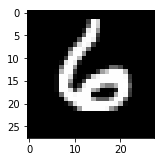

In [13]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

NameError: name 'y_test' is not defined

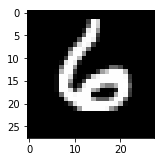

In [14]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))